# Video: Quick Visualizations of the Palmer Penguins

This video shows off some quick visualizations with the Palmer Penguins data set.
These visualizations should work for most data sets with a modest number of columns.
In addition, adjustment for missing data are demonstrated.

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
penguins_adelie = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.219.3&entityid=002f3893385f710df69eeebe893144ff", index_col="Sample Number")
penguins_gentoo = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.220.3&entityid=e03b43c924f226486f2f0ab6709d2381", index_col="Sample Number")
penguins_chinstrap = pd.read_csv("https://portal.edirepository.org/nis/dataviewer?packageid=knb-lter-pal.221.2&entityid=fe853aa8f7a59aa84cdd3197619ef462", index_col="Sample Number")
penguins = pd.concat([penguins_adelie, penguins_gentoo, penguins_chinstrap])
penguins

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
Sample Number,,,,,,,,,,,,,,,,
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
5,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,PAL0910,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
65,PAL0910,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
66,PAL0910,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.


Script:
* I loaded up the penguins dataset again.
* Let's start with histograms so we can see the distributions for each column.

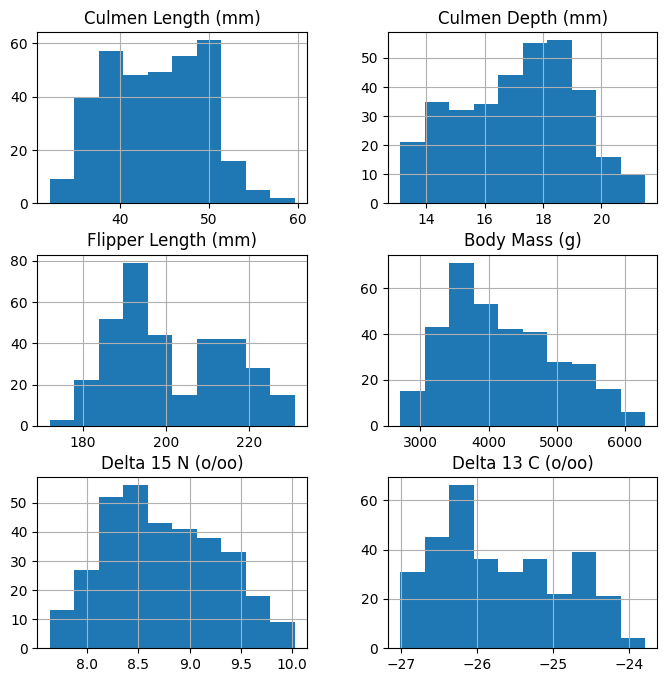

In [ ]:
_ = penguins.hist(figsize=(8, 8))

Script:
* These histograms are pretty lumpy.
* I'm not sure what to make of them.
* Let's move on to scatter plots.

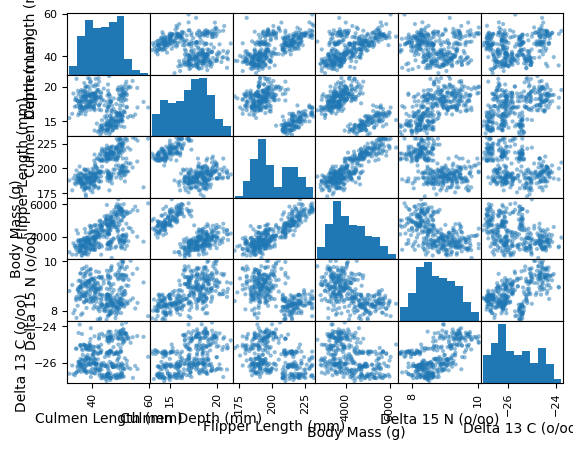

In [ ]:
_ = pd.plotting.scatter_matrix(penguins)

Script:
* The labels are messy, but there are a lot of patterns in those scatter plots.
* Several of them are split into multiple clusters.
* Are they meaningful?
* Some of them also have clear correlations, shown by the scatterplots looking like lines.
* Let's look if those clusters are related to the three species mixed together.

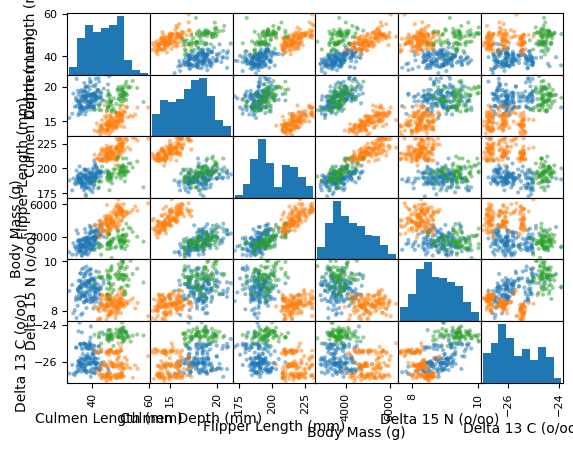

In [ ]:
penguins_colored = penguins.drop("Comments", axis=1).dropna()
penguins_colored["color"] = penguins_colored["Species"].map(dict(zip(penguins["Species"].unique(), plt.rcParams['axes.prop_cycle'].by_key()["color"])))
_ = pd.plotting.scatter_matrix(penguins_colored, color=penguins_colored["color"])

Script:
* The code to color points by species has some extra work to filter missing non-comment data, and to setup the colors.
* It is a bit complicated, so read it from the linked notebook later.
* For now, focus on the charts.
* There is indeed separation between the species.
* The orange color is usually separated, while green and blue color spots overlap in some of the charts.
* The orange color happens to be Gentoo penguins which are generally bigger.
* The green and blue colors are Adelie and Chinstrap penguins which are closer in size.
* However, you can still distinguish them in many of the charts.
* HOVER OVER SOME CHARTS WITH SEPARATION
* In this case, the data came with species labels, but you can imagine that future problems might ask you to separate out groups in a similar way.
* If you identify a particular pair of variables that looks good to you, you may want to plot just that pair.

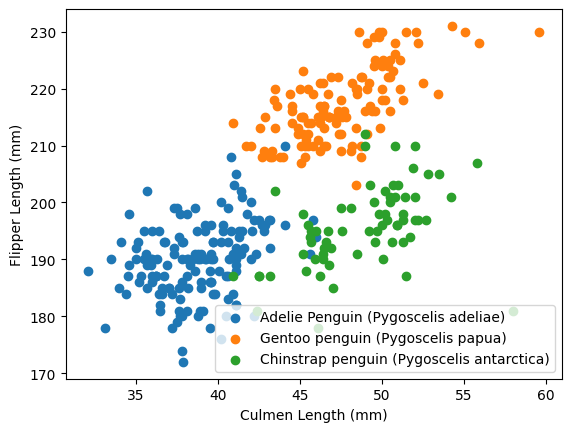

In [ ]:
x_column = "Culmen Length (mm)"
y_column = "Flipper Length (mm)"

for s in penguins["Species"].unique():
    penguins_s = penguins.query("Species == @s")
    plt.scatter(penguins_s[x_column], penguins_s[y_column], label=s)
plt.xlabel(x_column)
plt.ylabel(y_column)
_ = plt.legend()

Script:
* This code uses pandas dataframe queries to select and plot one species at a time.
* I used the Matplotlib scatter function to plot them all in the same chart.
* This was just easier than fiddling with pandas to force them together, and Matplotlib took care of the colors automatically.
* But in exchange for that, I had to handle all the labels.
* One last check to do with a new dataset is to check correlations between columns.

In [ ]:
penguins.corr(numeric_only=True)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,-0.235053,0.656181,0.595110,-0.059759,0.189025
Culmen Depth (mm),-0.235053,1.000000,-0.583851,-0.471916,0.605874,0.429933
Flipper Length (mm),0.656181,-0.583851,1.000000,0.871202,-0.507787,-0.376223
Body Mass (g),0.595110,-0.471916,0.871202,1.000000,-0.537888,-0.374638
Delta 15 N (o/oo),-0.059759,0.605874,-0.507787,-0.537888,1.000000,0.570615
Delta 13 C (o/oo),0.189025,0.429933,-0.376223,-0.374638,0.570615,1.000000


Script:
* The `numeric_only=True` argument filters out all the string columns.
* I'd prefer that happened automatically, but I suppose they wanted to be explicit about when data was ignored.
* Skimming the first column, I see a couple strong correlations between culmen length vs flipper length and body mass.
* Some people prefer to show these as a heatmap.

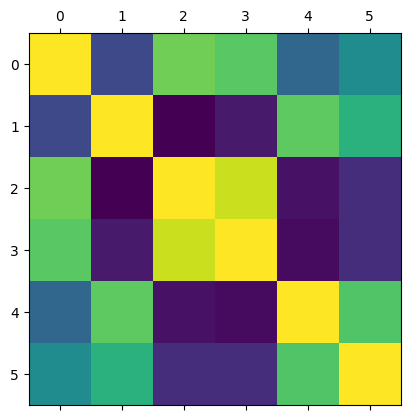

In [ ]:
_ = plt.matshow(penguins.corr(numeric_only=True))

Script:
* To be honest, I don't like this version.
* I always end up spot checking values to remind myself which colors correspond to which numbers.
* Using red vs green is marginally better to me.

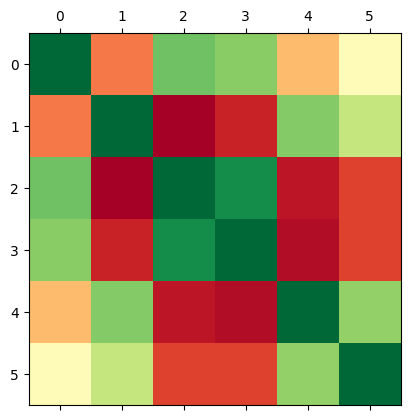

In [ ]:
plt.matshow(penguins.corr(numeric_only=True), cmap="RdYlGn")

Script:
* But I am not colorblind.
* Also, while it is easy to pick out correlations to 1 or -1 from dark green or red respectively, it is harder to make sense of values closer to zero which are yellowish here.
* So I often just go back to the raw numbers unless there are a lot of columns.
* That's it for this quick look through the Palmer Penguins data.
